# Activity Recognition Based on Body Parts Representation on Spheres
Alireza Parsay and Parsa Madinei

This document is for the final project of the course ECE 594n at UCSB. Our primary data set is Florence 3D actions dataset, a pubic data set which is collecte at the University of Florence [1].
This data set includes 215 samples for 9 activites from 10 subjects who perform each activity two or three times. The activities are normal activities such as standing up, sittig down, reading a watch, etc.

The theoritical idea is from [2] which analyzes different data sets including the mentioned data set for activity classification. In this paper, the angle and translation transform between two different body parts at one time stamp is considered as a Lie Group of degree 3. The transformation matrix is as follows:

$
P(R,\overrightarrow{d})=\begin{bmatrix}
R & \overrightarrow{d}\\
0 & 1
\end{bmatrix}
$

However, we decided to cosider the only the angle of each body part since we believe the mojority of information is the angles. Therefore, for each body part, we have a 2-dimensional Lie Group which is a sphere as will be shown.

# Data Preparation

In [1]:
# Imports
import geomstats.backend as gs
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import geomstats.visualization as viz

INFO: Using numpy backend


At this part, we only load the data set from the ".txt" file to a numpy array.

In [2]:
pose=np.loadtxt("Florence_dataset_WorldCoordinates.txt", dtype=float)
print(pose.shape)

(4016, 48)


In [3]:
labels = pose[:,2]

coordinates = np.zeros((4016, 15, 3))
for frame in range(4016):
    for joint_p in range(15):
        coordinates[frame, joint_p, 0] = pose[frame,3+joint_p*3+0]
        coordinates[frame, joint_p, 1] = pose[frame,3+joint_p*3+1]
        coordinates[frame, joint_p, 2] = pose[frame,3+joint_p*3+2]
coordinates.shape

(4016, 15, 3)

In [4]:
print(coordinates.shape)
print(labels.shape)

(4016, 15, 3)
(4016,)


In [5]:
video_id, n_frames = np.unique(pose[:,0], return_counts=True)
video_frames = dict(zip(video_id, n_frames))

# Data Visualization

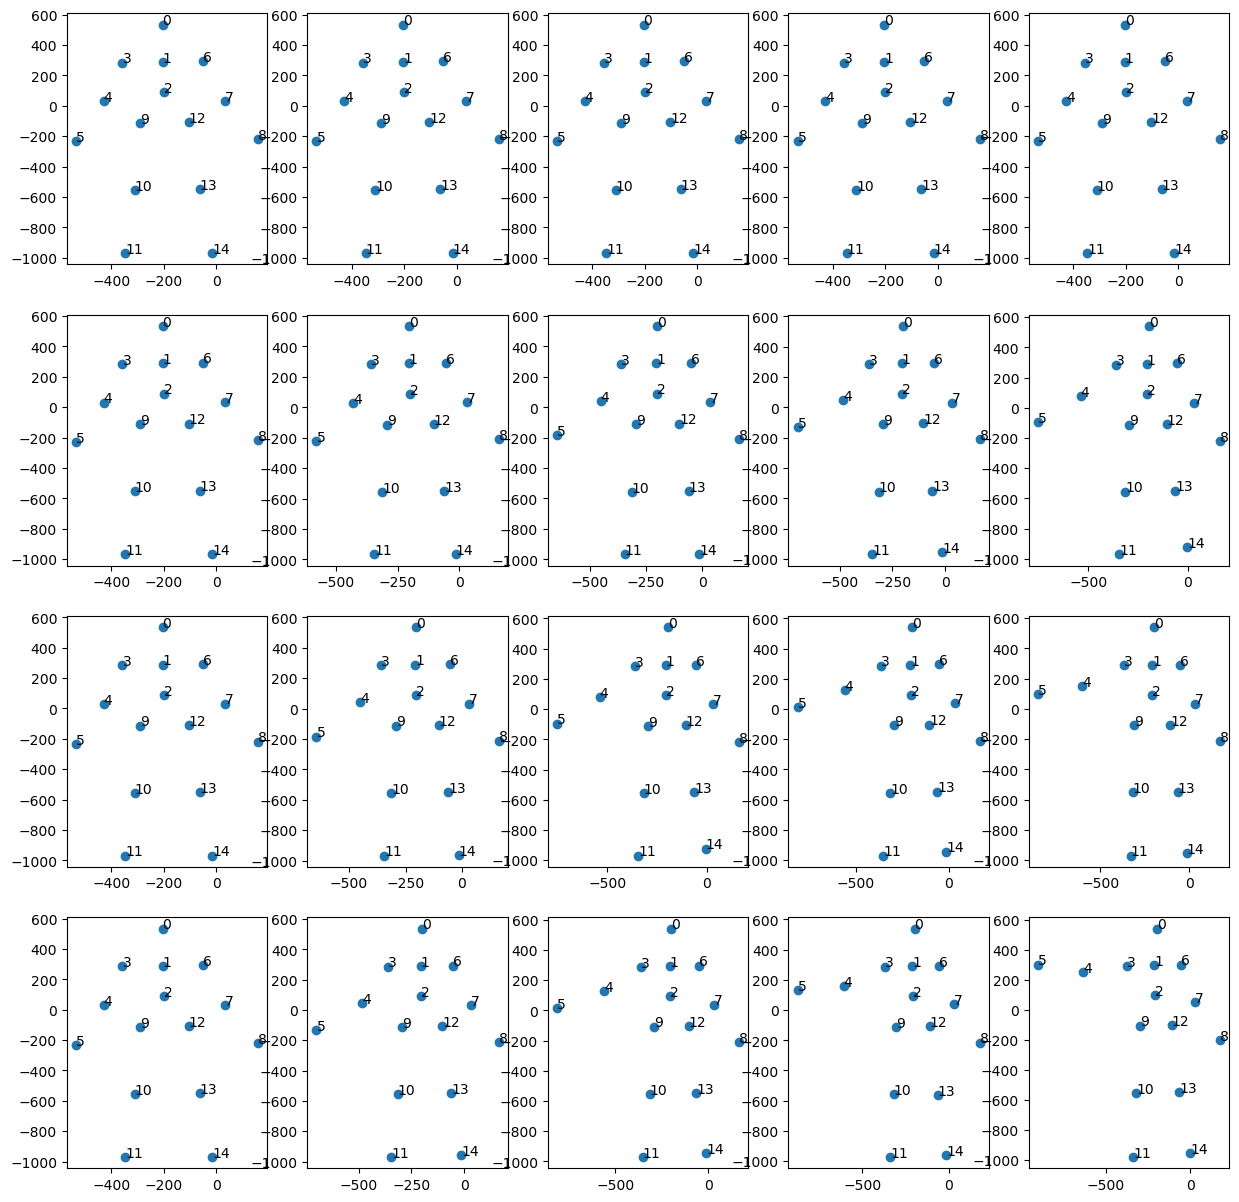

In [6]:
fig, axes = plt.subplots(4, 5,figsize=(15, 15))
for i in range(4):
    for j in range(5):
        
        axes[i, j].scatter(coordinates[i*j+28,:,0],
                           coordinates[i*j+28,:,1])
        for k in range(15):
            axes[i, j].annotate(k,(coordinates[i*j+28,k,0], coordinates[i*j+28,k,1]))

Head 0: f1-f3
Neck 1: f4-f6
Spine 2: f7-f9
Left Shoulder 3: f10-f12
Left Elbow 4: f13-f15
Left Wrist 5: f16-f18
Right Shoulder 6: f19-f21
Right Elbow 7: f22-f24
Right Wrist 8: f25-f27
Left Hip 9: f28-f30
Left Knee 10: f31-f33
Left Ankle 11: f34-f36
Right Hip 12: f37-f39
Right Knee 13: f40-f42
Right Ankle 14: f43-f45 [1]

# Vector extraction

In [7]:
def cart2sph(lst):
    x, y, z = lst
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return np.array((np.cos(el)*np.cos(az), np.cos(el)*np.sin(az), np.sin(el)))

In [8]:
int(video_frames[int(1)])

27

In [9]:
manifold_points = []
new_mani = []
new_mani_func = []
dif_labels = []
current_index = 0

In [10]:
for id_ in video_id:
    for frame in range(int(video_frames[int(id_)])):
        f = frame + current_index
        dif_labels.append(labels[f])
        
        vecHeadNeck = coordinates[f,0,:]-coordinates[f,1,:]
        vecNeckSpine = coordinates[f,1,:]-coordinates[f,2,:]
        vecLShoulderNeck = coordinates[f,1,:] - coordinates[f,3,:]
        vecRShoulderNeck = coordinates[f,1,:] - coordinates[f,6,:]
        vecLElbowLShoulder = coordinates[f,3,:] - coordinates[f,4,:]
        vecRElbowRShoulder = coordinates[f,6,:]-coordinates[f,7,:]
        vecLElbowLWrist = coordinates[f,4,:] - coordinates[f,5,:]
        vecRElbowRWrist = coordinates[f,7,:] - coordinates[f,8,:]
        vecLHipLKnee = coordinates[f,10,:] - coordinates[f,9,:]
        vecRHipRKnee = coordinates[f,13,:] - coordinates[f,12,:]
        vecLKneeLAnkle = coordinates[f,10,:] - coordinates[f,11,:]
        vecRKneeRAnkle = coordinates[f,13,:] - coordinates[f,14,:]
       
        
        new_mani.append(np.array([cart2sph(vecHeadNeck), cart2sph(vecNeckSpine), cart2sph(vecLShoulderNeck), 
                         cart2sph(vecRShoulderNeck), cart2sph(vecLElbowLShoulder), cart2sph(vecRElbowRShoulder), 
                         cart2sph(vecLElbowLWrist), cart2sph(vecRElbowRWrist), cart2sph(vecLHipLKnee), 
                         cart2sph(vecRHipRKnee), cart2sph(vecLKneeLAnkle), cart2sph(vecRKneeRAnkle)]))
        new_mani_func.append([coordinates[f,1,:],coordinates[f,2,:],coordinates[f,3,:],coordinates[f,6,:],coordinates[f,4,:],coordinates[f,7,:],coordinates[f,5,:],
                              coordinates[f,8,:],coordinates[f,9,:],coordinates[f,12,:],coordinates[f,11,:],coordinates[f,14,:]])
        
    current_index += int(video_frames[int(id_)])
    
new_mani = np.array(new_mani)
new_mani_func = np.array(new_mani_func)

# Vector visualization

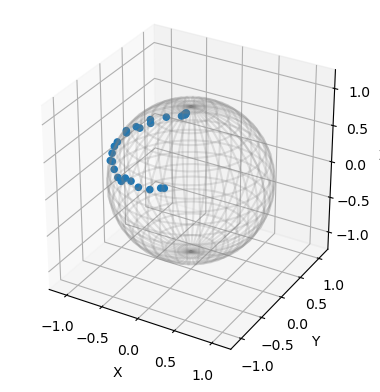

In [11]:
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(121, projection="3d")
ax = viz.plot(points=new_mani[:27,7,:], ax=ax, space="S2", s=20, alpha=1, label="Point")

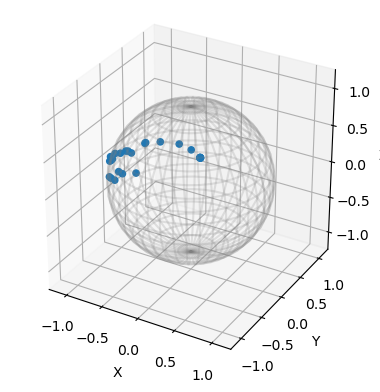

In [12]:
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(121, projection="3d")
ax = viz.plot(points=new_mani[:27,5,:], ax=ax, space="S2", s=20, alpha=1, label="Point")

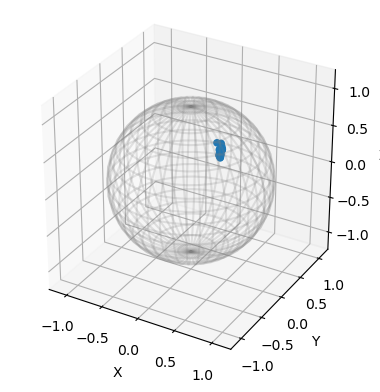

In [13]:
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(121, projection="3d")
ax = viz.plot(points=new_mani[:27,11,:], ax=ax, space="S2", s=20, alpha=1, label="Point")

In [14]:
new_mani_func.shape

(4016, 12, 3)

In [15]:
# df = pd.DataFrame(None)
# df['data'] = manifold_points
# df['color'] = dif_labels

# Feature extraction

In [16]:
def angularGenerator(lst):
    x, y, z = lst
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return el, az

## Extracted features include:
### 1- Variance of changes in Phi & Theta
### 2- Max - Min of changes in Phi & Theta
### 3- Mean of changes in Phi & Theta
### 4- Variance of Phi & Theta

In [17]:
import pyshtools as pysh
current_index = 0
sequence_theta = []
sequence_phi = []

features = np.zeros((96, 215))
f_labels = []

In [18]:
for id_ in video_id:
    for bone in range(12):
        sequence_theta = []
        sequence_phi = []
        for frame in range(int(video_frames[int(id_)])):
        
            f = frame + current_index
        
            theta, phi = angularGenerator(new_mani[frame,bone,:])
            sequence_theta.append(theta)
            sequence_phi.append(phi)
            
        # features[8*bone, int(id_)-1] = current_index
        features[8*bone+1, int(id_)-1] = np.var(np.diff(sequence_phi))
        features[8*bone+2, int(id_)-1] = np.var(np.diff(sequence_theta))
        features[8*bone+3, int(id_)-1] = np.var(sequence_theta)
        features[8*bone+4, int(id_)-1] = np.var(sequence_phi)
        features[8*bone+5, int(id_)-1] = np.mean(np.diff(sequence_theta))
        features[8*bone+6, int(id_)-1] = np.mean(np.diff(sequence_phi))
        features[8*bone+7, int(id_)-1] = np.max(sequence_theta)-np.min(sequence_theta)
        features[8*bone, int(id_)-1] = np.max(sequence_phi)-np.min(sequence_phi)
    
    f_labels.append(labels[current_index])        
    current_index += int(video_frames[int(id_)])

features = np.array(features).T
f_labels = np.array([int(i) for i in f_labels])
classes_to_exclude = [4, 5] # replace with class labels to exclude
mask = np.isin(f_labels, classes_to_exclude)
features = features[mask]
f_labels = f_labels[mask]

In [19]:
features=features/np.mean(features)

# Machine Learning Model
In this stury, we used Support Vector Machine classifier to classify class 4 of videos from 5. This idea can be applied for all bones.

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, f_labels, test_size=0.4)
# Define the SVC model
svc = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Train the model on the training set
svc.fit(X_train, y_train)

# Evaluate the model on the test set
test_acc = svc.score(X_test, y_test)
y_pred=svc.predict(X_test)

# Results

In [21]:
print('Test accuracy:', test_acc)
print(classification_report(y_test, y_pred))

Test accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           4       0.89      0.73      0.80        11
           5       0.77      0.91      0.83        11

    accuracy                           0.82        22
   macro avg       0.83      0.82      0.82        22
weighted avg       0.83      0.82      0.82        22



The classification only works well for classes 4 and 5, and it did not work well for others. However, for activities 4 and 5, the results show a good performance.

# Future work: Bone differences across frames in each video

        # Current frame bones
        vecHeadNeck = coordinates[f,0,:]-coordinates[f,1,:]
        
        
        # Next frame bones
        NvecHeadNeck = coordinates[f+1,0,:]-coordinates[f+1,1,:]
        
        
        # Difference in bones vectors
        difHeadNeck = lin_norm(vecHeadNeck - NvecHeadNeck)
        


# References
[1] https://www.micc.unifi.it/resources/datasets/florence-3d-actions-dataset/

[2] Human Action Recognition by Representing 3D Skeletons as Points in a Lie Group
*R. Vemulapalli, F. Arrate and R. Chellappa, "Human Action Recognition by Representing 3D Skeletons as Points in a Lie Group," 2014 IEEE Conference on Computer Vision and Pattern Recognition, Columbus, OH, USA, 2014, pp. 588-595, doi: 10.1109/CVPR.2014.82.

[3] Roddy, P.J. and McEwen, J.D., 2023. Slepian Scale-Discretised Wavelets on Manifolds. arXiv preprint arXiv:2302.06006.